In [1]:
!pip install -q darts

     |████████████████████████████████| 290 kB 4.2 MB/s 
     |████████████████████████████████| 155 kB 54.0 MB/s 
     |████████████████████████████████| 65 kB 3.8 MB/s 
     |████████████████████████████████| 791 kB 47.5 MB/s 
     |████████████████████████████████| 9.8 MB 31.9 MB/s 
     |████████████████████████████████| 1.4 MB 64.7 MB/s 
     |████████████████████████████████| 177 kB 60.9 MB/s 
     |████████████████████████████████| 11.2 MB 58.8 MB/s 
     |████████████████████████████████| 374 kB 58.9 MB/s 
     |████████████████████████████████| 884 kB 49.1 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 216 kB 60.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.24 which is incompatible.
google-colab 1

In [2]:
!pip install -q matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 4.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.14.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/retail_sales.csv')

In [5]:
series = TimeSeries.from_dataframe(df,'ds','y')

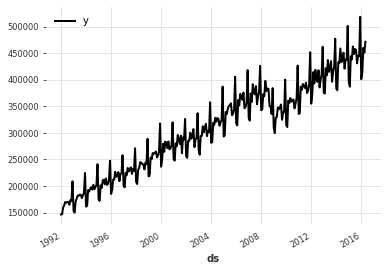

In [6]:
series.plot()

In [7]:
# Create training and validation sets:
train, val = series.split_after(pd.Timestamp('20140101'))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [10]:
# create month and year covariate series
year_series = datetime_attribute_timeseries(pd.date_range(start=series.start_time(), freq=series.freq_str, periods=1000),
                                             attribute='year', one_hot=False)
year_series = Scaler().fit_transform(year_series)
month_series = datetime_attribute_timeseries(year_series, attribute='month', one_hot=True)
covariates = year_series.stack(month_series)
cov_train, cov_val = covariates.split_after(pd.Timestamp('20140101'))

In [11]:
my_model = RNNModel(
    model='LSTM',
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=500,
    optimizer_kwargs={'lr': 1e-3}, 
    model_name='Air_RNN',
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=12,
    force_reset=True
)

In [12]:
my_model.fit(train_transformed,
             future_covariates=covariates,
             verbose=True)

[2021-12-10 05:16:58,909] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 245 samples.
[2021-12-10 05:16:58,909] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 245 samples.
[2021-12-10 05:16:58,969] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-12-10 05:16:58,969] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  0%|          | 1/500 [00:00<03:12,  2.59it/s]

  2%|▏         | 11/500 [00:02<01:47,  4.53it/s]

  4%|▍         | 21/500 [00:04<01:43,  4.64it/s]

  6%|▌         | 31/500 [00:06<01:42,  4.57it/s]

  8%|▊         | 41/500 [00:09<01:38,  4.66it/s]

 10%|█         | 51/500 [00:11<01:38,  4.55it/s]

 12%|█▏        | 61/500 [00:13<01:35,  4.62it/s]

 14%|█▍        | 71/500 [00:15<01:31,  4.68it/s]

 16%|█▌        | 81/500 [00:17<01:31,  4.60it/s]

 18%|█▊        | 91/500 [00:19<01:27,  4.69it/s]

 20%|██        | 101/500 [00:22<01:25,  4.69it/s]

 22%|██▏       | 111/500 [00:24<01:22,  4.70it/s]

 24%|██▍       | 121/500 [00:26<01:20,  4.70it/s]

 26%|██▌       | 131/500 [00:28<01:18,  4.71it/s]

 28%|██▊       | 141/500 [00:30<01:16,  4.71it/s]

 30%|███       | 151/500 [00:32<01:14,  4.66it/s]

 32%|███▏      | 161/500 [00:34<01:13,  4.59it/s]

 34%|███▍      | 171/500 [00:37<01:10,  4.66it/s]

 36%|███▌      | 181/500 [00:39<01:10,  4.52it/s]

 38%|███▊      | 191/500 [00:41<01:09,  4.47it/s]

 40%|████      | 201/500 [00:43<01:05,  4.57it/s]

 42%|████▏     | 211/500 [00:45<01:02,  4.60it/s]

 44%|████▍     | 221/500 [00:47<01:01,  4.52it/s]

 46%|████▌     | 231/500 [00:50<00:58,  4.62it/s]

 48%|████▊     | 241/500 [00:52<00:56,  4.58it/s]

 50%|█████     | 251/500 [00:54<00:53,  4.69it/s]

 52%|█████▏    | 261/500 [00:56<00:51,  4.69it/s]

 54%|█████▍    | 271/500 [00:58<00:48,  4.68it/s]

 56%|█████▌    | 281/500 [01:00<00:47,  4.66it/s]

 58%|█████▊    | 291/500 [01:03<00:46,  4.54it/s]

 60%|██████    | 301/500 [01:05<00:42,  4.63it/s]

 62%|██████▏   | 311/500 [01:07<00:41,  4.59it/s]

 64%|██████▍   | 321/500 [01:09<00:38,  4.61it/s]

 66%|██████▌   | 331/500 [01:11<00:36,  4.64it/s]

 68%|██████▊   | 341/500 [01:13<00:35,  4.51it/s]

 70%|███████   | 351/500 [01:16<00:31,  4.67it/s]

 72%|███████▏  | 361/500 [01:18<00:30,  4.57it/s]

 74%|███████▍  | 371/500 [01:20<00:27,  4.65it/s]

 76%|███████▌  | 381/500 [01:22<00:25,  4.65it/s]

 78%|███████▊  | 391/500 [01:24<00:23,  4.64it/s]

 80%|████████  | 401/500 [01:26<00:21,  4.62it/s]

 82%|████████▏ | 411/500 [01:29<00:19,  4.65it/s]

 84%|████████▍ | 421/500 [01:31<00:16,  4.68it/s]

 86%|████████▌ | 431/500 [01:33<00:14,  4.66it/s]

 88%|████████▊ | 441/500 [01:35<00:12,  4.66it/s]

 90%|█████████ | 451/500 [01:37<00:10,  4.52it/s]

 92%|█████████▏| 461/500 [01:39<00:08,  4.47it/s]

 94%|█████████▍| 471/500 [01:42<00:06,  4.45it/s]

 96%|█████████▌| 481/500 [01:44<00:04,  4.60it/s]

 98%|█████████▊| 491/500 [01:46<00:01,  4.53it/s]

100%|██████████| 500/500 [01:48<00:00,  4.61it/s]


In [13]:
predicted = my_model.predict(n=len(val_transformed))

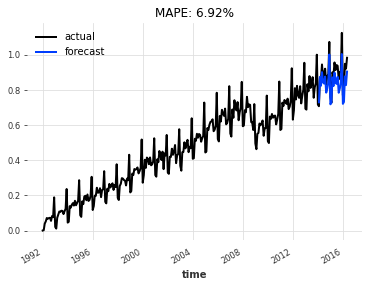

In [14]:
series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed)))
plt.legend()
plt.show()